<a href="https://colab.research.google.com/github/MGASALUCAS/Notebooks-Collection/blob/main/Plants_Diseases_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls

drive  sample_data


In [7]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [18]:
!mkdir config datasets models

mkdir: cannot create directory ‘config’: File exists
mkdir: cannot create directory ‘datasets’: File exists
mkdir: cannot create directory ‘models’: File exists


In [8]:
cd config

/content/drive/My Drive/Colab Notebooks/config


In [20]:
# from google.colab import files
# files.upload()

In [9]:
cd '/content/drive/My Drive/Colab Notebooks/datasets'

/content/drive/My Drive/Colab Notebooks/datasets


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/config"

In [11]:
cd '/content/drive/My Drive/Colab Notebooks/datasets'

/content/drive/My Drive/Colab Notebooks/datasets


In [27]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:19<00:00, 41.6MB/s]
100% 2.70G/2.70G [01:19<00:00, 36.4MB/s]


In [12]:
!ls

'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [29]:
#Unzipping the zip files to extract the dataset folder and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [30]:
for (root,dirs,files) in os.walk('.', topdown = True):
  print(root, dirs)

. ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
./New Plant Diseases Dataset(Augmented) ['New Plant Diseases Dataset(Augmented)']
./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented) ['train', 'valid']
./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato_

In [13]:
import os
base_dir = './New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
os.listdir(base_dir)

['train', 'valid']

In [14]:
len(os.listdir(os.path.join(base_dir, 'train')))

38

In [15]:
## IMPORTING THE REQUIRED LIBRARIES

In [16]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [17]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Import all neccesary Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
import warnings 
import argparse
warnings.filterwarnings('ignore')

# Importing the required libraries for modelling 
from keras import Input, Model
from keras.applications import MobileNet
from keras.layers.core import Flatten, Dense,Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


ImportError: ignored

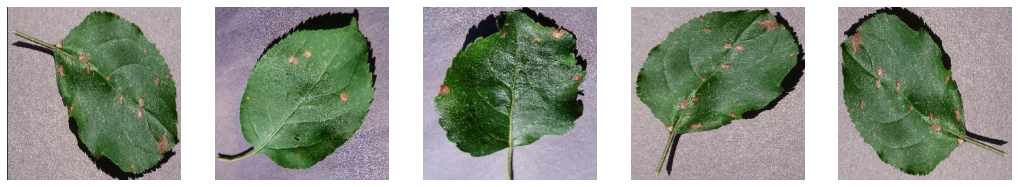

In [20]:
fig,axes = plt.subplots(1,5, figsize=(18,18))
images = os.listdir(os.path.join(base_dir, 'train/Apple___Black_rot'))
for _ in range(5):
  ax = axes[_]
  image_path = base_dir+'/train/Apple___Black_rot/'+images[_]
  img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
  ax.imshow(img)
  ax.axis('off')
plt.show()

In [44]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessessing.text import Tokenizer

2.9.2


ModuleNotFoundError: ignored

In [22]:
# Data augmentation for train dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

# Data augmentation for validation dataset (We only need to rescale)
validation_datagen = ImageDataGenerator(rescale = 1./255)

NameError: ignored

In [46]:
# Specify the batch size as 32 (or 64, 128, 256 e.t.c)
BATCH_SIZE = 32

# Load train dataset from the train dataset parent directory
train_set_from_dir = train_datagen.flow_from_directory(os.path.join(base_dir, 'train'),
                                                       target_size = (224,224),
                                                       batch_size = BATCH_SIZE,
                                                       class_mode = 'categorical'
                                                       )

# Load the validation dataset from the validation dataset parent directory
validation_set_from_dir = validation_datagen.flow_from_directory(os.path.join(base_dir, 'valid'),
                                                                 target_size = (224,224),
                                                                 batch_size = BATCH_SIZE,
                                                                 class_mode = 'categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [21]:
TRAIN_SIZE = train_set_from_dir.n
VALID_SIZE = validation_set_from_dir.n

NameError: ignored

In [ ]:
classes_dict = train_set_from_dir.class_indices

In [23]:
img = train_set_from_dir.filepaths[np.random.random_integers(low=0, high=train_set_from_dir.samples)]
img = cv2.imread(img)
plt.imshow(img)

NameError: ignored

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import L1L2
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ImportError: ignored

In [ ]:
model = Sequential()
# Convolutional 1st layer
model.add(Conv2D(32, kernel_size = (7,7), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional 2nd layer
model.add(Conv2D(64, kernel_size = (5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Convolutional 3rd layer
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Convolutional 4th layer
model.add(Conv2D(128, kernel_size=(3,3), activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Fully connected 1st layer
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Fully connected 2nd layer
model.add(Dense(1600, activation='relu'))
model.add(Dropout(0.2))

# Fully connected 3rd layer
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))

# Fully connected semi-final layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))

# Fully connected final layer (for 38 distinct categories hence 38 neurons)
model.add(Dense(38, activation = 'softmax'))

In [ ]:
INIT_LR = 3e-4
model.compile(optimizer = Adam(learning_rate = INIT_LR),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
model.summary()

In [ ]:
## Setting up callbacks for our model

callbacks = [
           ModelCheckpoint('/content/drive/My Drive/PLANT DISEASE RECOGNITION/checkpoints/cnnmodel_plantdiseases.h5', save_best_only=True, monitor='val_accuracy'),
           EarlyStopping(monitor='val_loss', patience=10, verbose=1),
           ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1) 
]

In [ ]:
N_EPOCHS = 20

history = model.fit(train_set_from_dir,
          validation_data = validation_set_from_dir,
          epochs = N_EPOCHS,
          # # Use 128 random batches for training set 
          steps_per_epoch = 128, # 150 x 32 =  random samples
          # # Use 64 random batches for training validation set
          validation_steps = 64, # 100 x 32 = 3200 random samples 
          callbacks = callbacks
          )

In [ ]:
# Importing the required libraries for modelling 
from keras import Input, Model
from keras.applications import MobileNet
from keras.layers.core import Flatten, Dense,Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
base_model = MobileNet(
    #Load weights into the pre-trained MobileNet model
    weights="imagenet",
    input_shape=(224, 224, 3),
    #Exclude the ImageNet classifier at the top of the model
    include_top=False
)  

In [ ]:
base_model.summary()

In [ ]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
# Regularization by applying DropOut
head_model = Dropout(0.2)(head_model)
outputs = Dense(38, activation="softmax")(head_model)
mobilenet_model = Model(base_model.input, outputs, name='pretrained_mobilenet' )

for layer in mobilenet_model.layers:
    layer.trainable = False

# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
# Compiling the model with the optimizer and loss function 

mobilenet_model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
mobilenet_model.summary()
for idx, layer in enumerate(mobilenet_model.layers):
    print(idx, layer.name, layer.trainable)

In [ ]:
## Setting up callbacks for our model

callbacks = [
           ModelCheckpoint('content/drive/My Drive/PLANT DISEASE RECOGNITION/checkpoints/mobilenet_plantdiseases.h5', save_best_only=True, monitor='val_acc'),
           EarlyStopping(monitor='val_loss', patience=2, verbose=1),
           ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1) 
]

In [ ]:
N_EPOCHS = 10

history = mobilenet_model.fit(train_set_from_dir,
          validation_data = validation_set_from_dir,
          epochs = N_EPOCHS,
          # Use 128 random batches for training set 
          steps_per_epoch = 128, # 128 x 32 = 2**12 random samples
          # Use 64 random batches for training validation set
          validation_steps = 100, # 100 x 32 = 3200 random samples 
          callbacks = callbacks
          )

In [ ]:
n = 6
plt.figure(figsize = (8,5))
plt.plot(np.arange(1,n+1), history.history['loss'], label = 'train_loss')
plt.plot(np.arange(1,n+1), history.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(1,n+1), history.history['accuracy'], label = 'train_accuracy')
plt.plot(np.arange(1,n+1), history.history['val_accuracy'], label = 'val_accuracy')

plt.grid(True)
plt.legend(loc = "best")
plt.savefig('/content/drive/My Drive/PLANT DISEASE RECOGNITION/performance.jpg')
plt.show()

In [ ]:
# Evaluate the model on the Validation dataset
results = mobilenet_model.evaluate(validation_set_from_dir)

In [ ]:
print("Validation Loss :-", results[0])
print("="*30)
print("Validation Accuracy :-", results[1])

In [ ]:
cd '/content/drive/My Drive/PLANT DISEASE RECOGNITION'

In [ ]:
mkdir models

In [ ]:
# Save model in HDF5 format
mobilenet_model.save('models/mobilenet_model.h5')

In [ ]:
# Testing on a random image from the test images directory
from PIL import Image
np.random.seed(200)
idx = np.random.randint(30)
test_images_dir = os.path.join('datasets/test', 'test')
test1 = Image.open(os.path.join(test_images_dir, os.listdir(test_images_dir)[idx]))

In [ ]:
plt.imshow(test1)
plt.title(os.listdir(test_images_dir)[idx])

In [ ]:
test1 = test1.resize((224,224))
test1_scaled = np.expand_dims(np.asarray(test1), axis = 0) / 255
predictions = mobilenet_model.predict(test1_scaled)
print(predictions)

In [ ]:
classes_dict = train_set_from_dir.class_indices
classes_dict = { v:k for (k,v) in classes_dict.items() }
classes_dict[np.argmax(predictions)]

In [ ]:
from tensorflow.python.keras.models import load_model
mobilenet_model = load_model('models/mobilenet_model.h5')

In [ ]:
mobilenet_model.summary()

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(mobilenet_model)
tflite_model = converter.convert()
open("models/converted_model.tflite", "wb").write(tflite_model)

In [ ]:
!pip install tensorflowjs

In [ ]:
!pwd

In [ ]:
!mkdir tensorflowjs-model

In [ ]:
!tensorflowjs_converter --input_format keras models/mobilenet_model.h5 tensorflowjs-model/

In [ ]:
!zip -r tensorflowjs-model.zip tensorflowjs-model

In [48]:
import json
classes_dict = train_set_from_dir.class_indices
with open('/content/drive/My Drive/Colab Notebooks/class_indices.json','w') as f:
    json.dump(classes_dict, f)

In [52]:
# This is the base model for MobileNet V2, containing different conv. layers 
base_model = MobileNet(
    #Load weights into the pre-trained MobileNet model
    weights="imagenet",
    # Input shape for the mode (height, width, number of channels)
    input_shape=(224, 224, 3),
    #Exclude the ImageNet classifier at the top of the model
    include_top=False
)  

#base_model.summary()

head_model = base_model.output
# Apply Global Average Pooling on the output
head_model = GlobalAveragePooling2D()(head_model)
# Perform Regularization by applying Dropout
head_model = Dropout(0.2)(head_model)
# We are using 38 neurons in the final dense layer because we have 38 distinct classes for prediction
# We are using softmax because it is a multi-class classification problem, to get probability distribution for each outcome.
outputs = Dense(38, activation="softmax")(head_model)
#Finally building the model with the inputs and outputs
mobilenet_model = Model(base_model.input, outputs, name='pretrained_mobilenet' )

#Freezing all layers
for layer in mobilenet_model.layers:
    layer.trainable = False

# We want to ensure that all the pre-trained weights are non-trainable, and train only the last few layers
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

17225924/17225924 [==============================] - 1s 0us/step


NameError: ignored

In [50]:
# Compiling the model with the optimizer and loss function
# categorical_accuracy is used as the loss function because it is a multi-class classification task
mobilenet_model.compile(optimizer = Adam(),
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy']
)

NameError: ignored

In [53]:

## Setting up callbacks for our model
# EarlyStopping to prevent overfitting, by stopping training once performance stops improving on validation set 
# ModelCheckpoint to save model checkpoints in the checkpoints folder

callbacks = [
           ModelCheckpoint('content/drive/My Drive/PLANT DISEASE RECOGNITION/checkpoints/mobilenet_plantdiseases.h5', save_best_only=True, monitor='val_acc'),
           EarlyStopping(monitor='val_loss', patience=2, verbose=1),
           ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1) 
]

# Specify Number of epochs = 10
N_EPOCHS = 10

history = mobilenet_model.fit(train_set_from_dir,
          validation_data = validation_set_from_dir,
          epochs = N_EPOCHS,
          # Use 128 random batches for training set 
          steps_per_epoch = 128, # 128 x 32 = 2**12 random samples
          # Use 64 random batches for training validation set
          validation_steps = 100, # 100 x 32 = 3200 random samples 
          callbacks = callbacks
          )

NameError: ignored

In [55]:
n = 6
plt.figure(figsize = (8,5))
plt.plot(np.arange(1,n+1), history.history['loss'], label = 'train_loss')
plt.plot(np.arange(1,n+1), history.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(1,n+1), history.history['accuracy'], label = 'train_accuracy')
plt.plot(np.arange(1,n+1), history.history['val_accuracy'], label = 'val_accuracy')
plt.grid(True)
plt.legend(loc = "best")
plt.savefig('/content/drive/My Drive/Colab Notebooks/performance.jpg')
plt.show()

NameError: ignored

<Figure size 576x360 with 0 Axes>

In [ ]:
# Save model as HDF5 format
mobilenet_model.save('/content/drive/My Drive/Colab Notebooks/models/mobilenet_model.h5')